In [108]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
# import tensorflow as tf
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [109]:
filename = "heart.csv"
df = pd.read_csv(filename)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
min = df["oldpeak"].min()
max = df["oldpeak"].max()
print(min,max)

0.0 6.2


In [111]:
infor = df.describe()

df2 = df[df.trestbps < infor.loc["mean", "trestbps"] + 3 * infor.loc["std", "trestbps"]]
df3 = df2[df.chol < infor.loc["mean", "chol"] + 3 * infor.loc["std", "chol"]]
df4 = df3[df.thalach > infor.loc["mean", "thalach"] - 3 * infor.loc["std", "thalach"]]
df_new = df4[df.oldpeak < infor.loc["mean", "oldpeak"] + 3 * infor.loc["std", "oldpeak"]]
df_new.head()

<ipython-input-111-1a0684d6a76b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df.chol < infor.loc["mean", "chol"] + 3 * infor.loc["std", "chol"]]
<ipython-input-111-1a0684d6a76b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[df.thalach > infor.loc["mean", "thalach"] - 3 * infor.loc["std", "thalach"]]
<ipython-input-111-1a0684d6a76b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df4[df.oldpeak < infor.loc["mean", "oldpeak"] + 3 * infor.loc["std", "oldpeak"]]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [112]:
scaler = StandardScaler()
X = df_new.drop("target", 1).values
y = df_new["target"].astype("int").values
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=15)

X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [113]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return ""
def Model_Validation(item):
    yhat = item.predict(X_train)
    DT_Tr_Acc = accuracy_score(yhat,y_train)


    yhat = item.predict(X_test)
    DT_Ts_Acc = accuracy_score(yhat,y_test)

    print('Training Accuracy : ', DT_Tr_Acc )


    print('Testing Accuracy : ', DT_Ts_Acc )


    tp,fn,fp,tn = confusion_matrix(y_test, yhat, labels=[1,0]).ravel()
    tp,tn,fp,fn

    cmx = confusion_matrix(y_test, yhat, labels=[1,0])
    print(plot_confusion_matrix(cmx, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix'))

    precision_rate = tp / (tp + fp)
    recall_rate = tp / (tp + fn)
    print("The precision rate is: ", precision_rate)
    print("The recall rate is: ", recall_rate)

### Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    # 'n_estimators': [50,100,200, 300,500,1000,2000,3000],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth' : [4,5,6,7,8,20,30,50,100,150,200,300],
    # 'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


RFC_model = RandomForestClassifier(n_estimators=3000,max_features='auto',max_depth=300,criterion='entropy' )

RFC_model.fit(X_train, y_train)

Model_Validation(RFC_model)

In [ ]:
import pickle
pickle.dump(RFC_model, open('RFC_model.pkl', 'wb'))
# RFC_model = pickle.load(open('RFC_model.pkl', 'rb'))
# print(RFC_model)

In [ ]:
predicted_class = RFC_model.predict(X_test[27,None])
predicted_prob = RFC_model.predict_proba(X_test[27,None])
print("Predicted Class :", predicted_class)
confidence = predicted_prob[0][1] if predicted_class == 1 else predicted_prob[0][0] 
print("Confidence :", confidence)

### Neural Network

Training Accuracy :  0.8863636363636364
Testing Accuracy :  0.8513513513513513


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


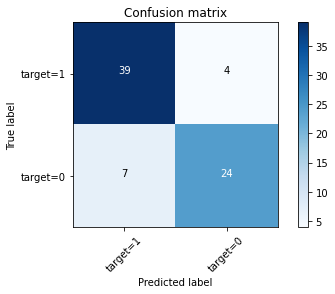


The precision rate is:  0.8478260869565217
The recall rate is:  0.9069767441860465


In [160]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(solver='adam', alpha=0.01, hidden_layer_sizes=(11,1), random_state=1)

nn_model = clf.fit(X_train, y_train)

Model_Validation(nn)


In [170]:
nn_predicted_class = nn_model.predict(X_test[6,None])
nn_predicted_prob = nn_model.predict_proba(X_test[6,None])
print("Predicted Class :", nn_predicted_class[0])
nn_confidence = nn_predicted_prob[0][1] if nn_predicted_class == 1 else nn_predicted_prob[0][0] 
print("Confidence :", nn_confidence)

Predicted Class : 0
Confidence : 0.6362105839666287


In [171]:
import pickle
pickle.dump(nn_model, open('NN_model.pkl', 'wb'))
NN_model = pickle.load(open('NN_model.pkl', 'rb'))
print(NN_model)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(11, 1), random_state=1)


### Support Vector Machine

In [ ]:
# defining parameter range
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
cv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
 
# fitting the model for grid search
cv.fit(X_train, y_train)

In [ ]:
C = cv.best_estimator_.C
kernel = cv.best_estimator_.kernel
gamma = cv.best_estimator_.gamma

SVC_model = SVC(C=C,kernel=kernel,gamma=gamma,probability=True )
SVC_model = SVC_model.fit(X_train , y_train)
Model_Validation(SVC_model)

In [ ]:
predicted_class = SVC_model.predict(X_test[27,None])
predicted_prob = SVC_model.predict_proba(X_test[27,None])
print("Predicted Class :", predicted_class)
confidence = predicted_prob[0][1] if predicted_class == 1 else predicted_prob[0][0] 
print("Confidence :", confidence)

In [ ]:
import pickle
pickle.dump(SVC_model, open('SVC_model.pkl', 'wb'))
SVC_model = pickle.load(open('SVC_model.pkl', 'rb'))
print(SVC_model)

### Decision Tree

In [ ]:
DT_model  = tree.DecisionTreeClassifier(criterion='entropy',max_depth=200)

DT_model.fit(X_train, y_train)
Model_Validation(DT_model)

In [ ]:
predicted_class = DT_model.predict(X_test[10,None])
predicted_prob = DT_model.predict_proba(X_test[10,None])
print("Predicted Class :", predicted_class[0])
confidence = predicted_prob[0][1] if predicted_class[0] == 1 else predicted_prob[0][0] 
print("Confidence :", confidence)

In [ ]:
pickle.dump(DT_model, open('DT_model.pkl', 'wb'))
DT_model = pickle.load(open('DT_model.pkl', 'rb'))
print(DT_model)

In [ ]:
!pip freeze > requirements2.txt

In [ ]:
!pip show keras

In [ ]:
!pip show matplotlib

In [ ]:
!pip show tensorflow

In [ ]:
!pip install tensorflow

In [1]:
from keras.models import Sequential

ModuleNotFoundError: No module named 'keras'

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: d:\anaconda3\lib\site-packages
Requires: astunparse, gast, h5py, opt-einsum, tensorflow-estimator, tensorboard, wrapt, six, termcolor, scipy, wheel, keras-preprocessing, grpcio, absl-py, google-pasta, numpy, protobuf
Required-by: 
